In [1]:
import numpy as np
import pandas as pd

In [2]:
df1=pd.read_csv("C:\\Users\\Person\\Downloads\\Compressed\\churn_data.csv")
nrows=100

In [3]:
df1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#housing_map = {'yes': 1, 'no': 0}
#sampleDF['housing'] = sampleDF['housing'].map(housing_map)
churn_value={'Yes':1,'No':0}
df1['Churn']=df1['Churn'].map(churn_value)

In [5]:
df1['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [6]:
Billing={'Yes':1,'No':0}
df1['PaperlessBilling']=df1['PaperlessBilling'].map(Billing)

In [7]:
df1['PaperlessBilling'].head()

0    1
1    0
2    1
3    0
4    1
Name: PaperlessBilling, dtype: int64

In [8]:
df1['Total_charges']=df1['tenure']*df1['MonthlyCharges']
print(df1['Total_charges'].head())

0      29.85
1    1936.30
2     107.70
3    1903.50
4     141.40
Name: Total_charges, dtype: float64


In [9]:
Phone={'Yes':1,'No':0}
df1['PhoneService']=df1['PhoneService'].map(Phone)

In [10]:
df1['PhoneService'].head()

0    0
1    1
2    1
3    0
4    1
Name: PhoneService, dtype: int64

In [11]:
df1['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [12]:
df1['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
df2=df1.drop(['TotalCharges','Contract','PaymentMethod'],axis=1)
df2.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,Total_charges
0,7590-VHVEG,1,0,1,29.85,0,29.85
1,5575-GNVDE,34,1,0,56.95,0,1936.30
2,3668-QPYBK,2,1,1,53.85,1,107.70
3,7795-CFOCW,45,0,0,42.30,0,1903.50
4,9237-HQITU,2,1,1,70.70,1,141.40


# Cleaning Data

In [14]:
df2.isnull().sum()

customerID          0
tenure              0
PhoneService        0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
Total_charges       0
dtype: int64

In [15]:
df2.corr(method='pearson')

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,Total_charges
tenure,1.000000,0.008448,0.006152,0.247900,-0.352229,0.826568
PhoneService,0.008448,1.000000,0.016505,0.247398,0.011942,0.113336
PaperlessBilling,0.006152,0.016505,1.000000,0.352150,0.191825,0.158843
MonthlyCharges,0.247900,0.247398,0.352150,1.000000,0.193356,0.651566
Churn,-0.352229,0.011942,0.191825,0.193356,1.000000,-0.198514
Total_charges,0.826568,0.113336,0.158843,0.651566,-0.198514,1.000000


In [16]:
print(df2['Total_charges'].quantile(0.10))
print(df2['Total_charges'].quantile(0.90))
print(df2['Total_charges'].skew())

82.92000000000002
5978.84
0.9606366798869088


In [17]:
print(df2['Churn'].quantile(0.10))
print(df2['Churn'].quantile(0.90))
print(df2['Churn'].skew())

0.0
1.0
1.063031444575135


In [18]:
print(df2['MonthlyCharges'].quantile(0.10))
print(df2['MonthlyCharges'].quantile(0.90))
print(df2['MonthlyCharges'].skew())

20.05
102.6
-0.22052443394398033


In [19]:
df2['MonthlyCharges']=np.log(df2['MonthlyCharges'])
print(df2['MonthlyCharges'].skew())

-0.7289749716031325


In [20]:
import matplotlib.pyplot as plt
plt.boxplot(df2['MonthlyCharges'])

{'whiskers': [<matplotlib.lines.Line2D at 0x213b96fc408>,
 'caps': [<matplotlib.lines.Line2D at 0x213b96fcbc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x213b91c5f88>],
 'medians': [<matplotlib.lines.Line2D at 0x213b9706cc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x213b970ae48>],
 'means': []}

In [21]:
print(df2['PaperlessBilling'].quantile(0.10))
print(df2['PaperlessBilling'].quantile(0.90))
print(df2['PaperlessBilling'].skew())

0.0
1.0
-0.3753957475037238


In [22]:
print(df2['PhoneService'].quantile(0.10))
print(df2['PhoneService'].quantile(0.90))
print(df2['PhoneService'].skew())

1.0
1.0
-2.727152938440572


In [23]:
print(df2['tenure'].quantile(0.10))
print(df2['tenure'].quantile(0.90))
print(df2['tenure'].skew())

2.0
69.0
0.2395397495619829


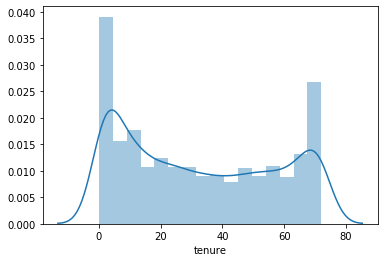

In [24]:
import seaborn as sns
sns.distplot(df2['tenure'])

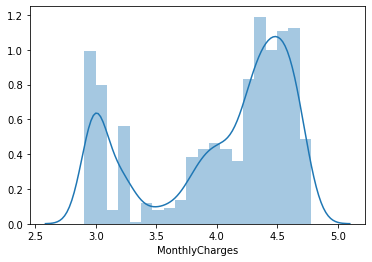

In [25]:
sns.distplot(df2['MonthlyCharges'])

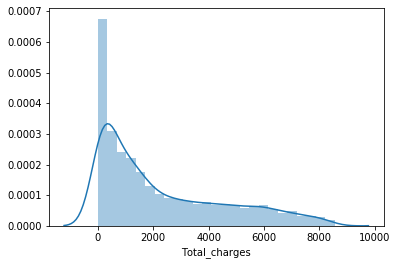

In [26]:
sns.distplot(df2['Total_charges'])

# Making the model - KNN Classifier

In [27]:
features=df2[['Total_charges','MonthlyCharges','tenure','PhoneService','PaperlessBilling']]
target=df2.Churn

In [28]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier 

In [29]:
features=preprocessing.MinMaxScaler().fit_transform(features)

In [30]:
from sklearn.model_selection import train_test_split
features_train,features_test,target_train,target_test= train_test_split(features,target, test_size=0.3)

In [31]:
model=KNeighborsClassifier(n_neighbors=20)
fittedModel=model.fit(features_train,target_train)
predictions=fittedModel.predict(features_test)

In [32]:
from sklearn.metrics import confusion_matrix   
from sklearn.metrics import accuracy_score
conf_m=confusion_matrix(target_test,predictions)
conf_m

array([[1426,  129],
       [ 320,  238]], dtype=int64)

In [33]:
accuracy_score(target_test,predictions)

0.7875059157595835

In [34]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,features,target, cv=100)
scores

array([0.77464789, 0.78873239, 0.78873239, 0.77464789, 0.73239437,
       0.81690141, 0.78873239, 0.74647887, 0.81690141, 0.76056338,
       0.77464789, 0.81690141, 0.85915493, 0.77464789, 0.73239437,
       0.76056338, 0.81690141, 0.76056338, 0.81690141, 0.83098592,
       0.76056338, 0.78873239, 0.78873239, 0.8028169 , 0.83098592,
       0.76056338, 0.73239437, 0.8028169 , 0.70422535, 0.84507042,
       0.81690141, 0.87323944, 0.78873239, 0.73239437, 0.73239437,
       0.73239437, 0.83098592, 0.81690141, 0.78873239, 0.8028169 ,
       0.73239437, 0.76056338, 0.8028169 , 0.75714286, 0.72857143,
       0.81428571, 0.78571429, 0.78571429, 0.74285714, 0.72857143,
       0.75714286, 0.8       , 0.82857143, 0.78571429, 0.74285714,
       0.8       , 0.75714286, 0.74285714, 0.78571429, 0.8       ,
       0.8       , 0.81428571, 0.74285714, 0.78571429, 0.82857143,
       0.8       , 0.77142857, 0.77142857, 0.78571429, 0.85714286,
       0.71428571, 0.72857143, 0.74285714, 0.81428571, 0.77142